# Lab 3: Linear Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)


In [2]:
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [3]:
A = np.array([3,5,11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '

In [4]:
A.sum()

19

## 3.6.2 Simple Linear Regression

* **medv** (Median house value)
* **rmvar** (Average number of rooms per house)
* **age** (Proportion of owner-occupied units built prior to 1940)
* **lstat** (Percent of households with low socioeconomic status)

In [6]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [7]:
X = pd.DataFrame({"intercept": np.ones(Boston.shape[0]),
                  "lstat": Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [8]:
y = Boston['medv']
model = sm.OLS(y,X)
results = model.fit()

In [9]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [ ]:
# fValue = ((TSS - RSS) / p ) / ((RSS) / (df)) 
# df -> degrees of freedom = n - p - 1

# TSS -> Total sum of squares = SUM((y - avg(y))^2)
# RSS -> Residual sum of squares = SUM((y - yhat)^2)

yhats = results.fittedvalues
N = yhats.size

y_mean = 1/N * y.sum()

TSS = np.sum((y - y_mean) ** 2)
RSS = np.sum((y - yhats) ** 2)

print(f"N observation: {N}")
print(f"Y Mean: {y_mean}")
print(f"TSS: {TSS}")
print(f"RSS: {RSS}")

p = 1
df = N - p - 1
f_value = ((TSS - RSS) / p) / ((RSS) / df)

print(f"f value {f_value}")

N observation: 506
Y Mean: 22.532806324110673
TSS: 42716.29541501976
RSS: 19472.381418326437
t value for 601.6178711098953


In [29]:
# t_value = Bhat / SE(Bhat) 

beta_lstat = results.params['lstat']
se_lstat = results.bse['lstat']
t_value = beta_lstat / se_lstat
t_value

-24.527899851187758

In [32]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [33]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           5.08e-88
Time:                        12:24:43   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [36]:
new_df = pd.DataFrame({'lstat':[5,10,15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [37]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [39]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [40]:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [41]:
def abline(ax,b,m, *args, **kwargs):
    """Add a line with slope m and intercept b to ax"""
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim,ylim, *args, **kwargs)

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_10520\2990299352.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0], results.params[1],'r--',linewidth=3)


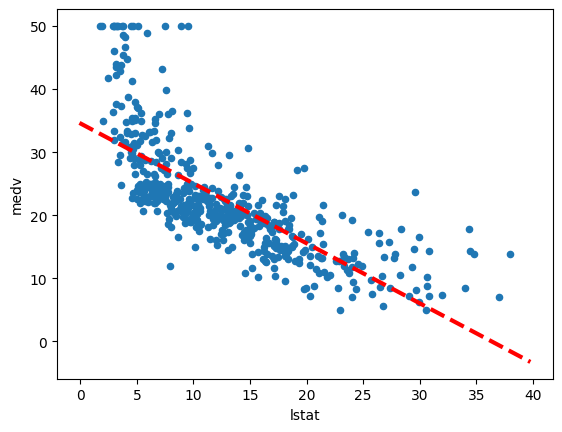

In [46]:
ax = Boston.plot.scatter('lstat','medv')
abline(ax, results.params[0], results.params[1],'r--',linewidth=3)

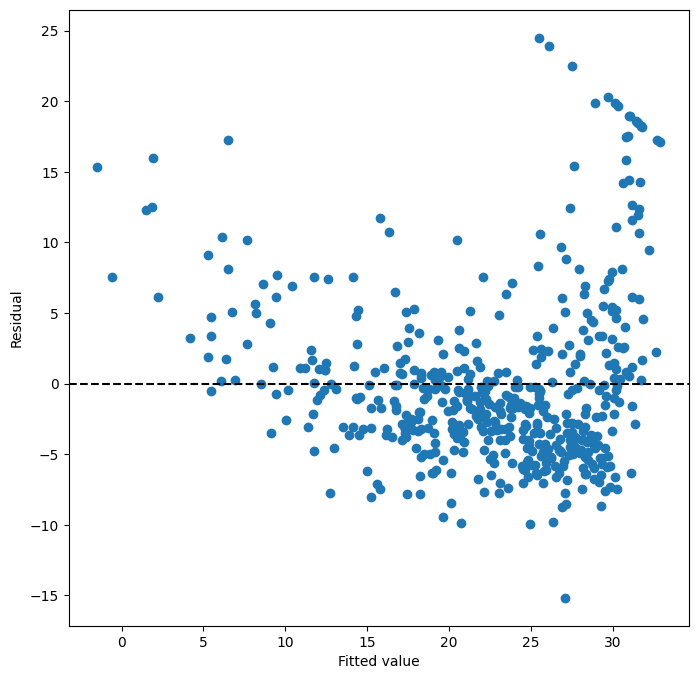

In [48]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c='k',ls='--')

374 with value: 0.0268651665102835


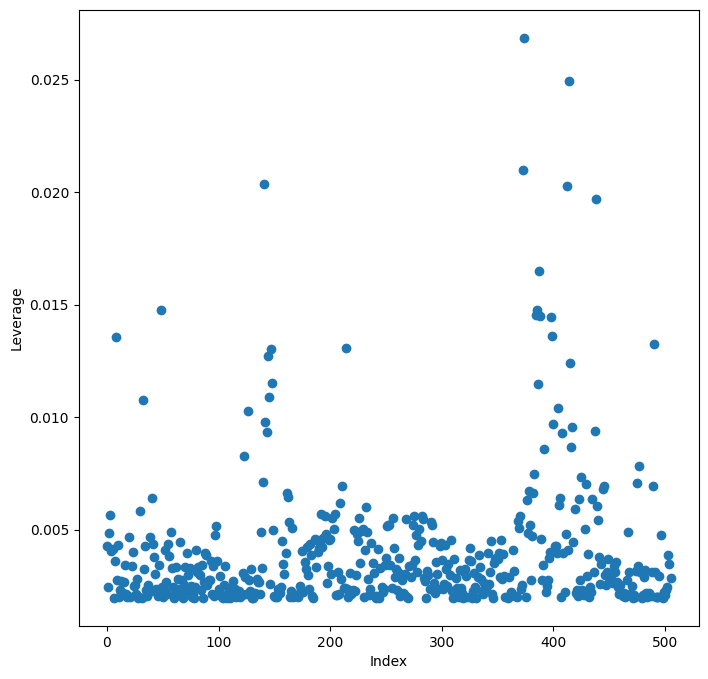

In [50]:
inf1 = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]),inf1.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
idx = np.argmax(inf1.hat_matrix_diag)
print(f"{idx} with value: {inf1.hat_matrix_diag[idx]}")

## 3.6.3 Multiple Linear Regression

In [51]:
X = MS(['lstat','age']).fit_transform(Boston)
model1 = sm.OLS(y,X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [52]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [55]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y,X)
results = model.fit()

summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [56]:
minus_age = Boston.columns.drop(['medv','age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y,Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


## 3.6.4 Multivariate Goodness of fit

In [57]:
vals = [VIF(X,i) for i in range(1,X.shape[1])]
vif = pd.DataFrame({'vif':vals}, index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [58]:
vals = []
for i in range(1,X.values.shape[1]):
    vals.append(VIF(X.values,i))
vals

[1.7674859154310125,
 2.2984589077358097,
 3.9871806307570994,
 1.0711677737584042,
 4.369092622844793,
 1.9125324374368864,
 3.0882320397311984,
 3.954036641628298,
 7.445300760069838,
 9.002157663471797,
 1.797059593129779,
 2.8707765008417496]

In [59]:
X = MS(['lstat','age',('lstat','age')]).fit_transform(Boston)
model2 = sm.OLS(y,X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


## 3.6.6 Non-linear Transformations of the Predictors

In [60]:
X = MS([poly('lstat',degree=2),'age']).fit_transform(Boston)
model3 = sm.OLS(y,X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [61]:
anova_lm(results1,results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


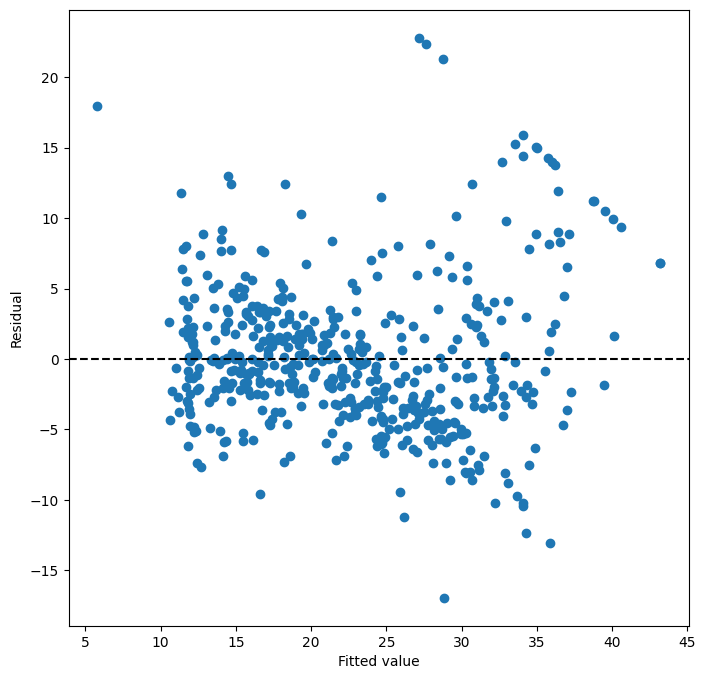

In [62]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0,c='k',ls="--")

## 3.6.7 Qualitative Predictors

In [64]:
Carseats = load_data("Carseats")
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [65]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final =  allvars + [('Income','Advertising'),('Price','Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y,X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


## Zadania 

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

def abline(ax,b,m, *args, **kwargs):
    """Add a line with slope m and intercept b to ax"""
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim,ylim, *args, **kwargs)


### 8

In [2]:
Auto = pd.read_csv("data/Auto.csv")

In [3]:
# Ensure numeric types for mpg and horsepower (Auto.csv may contain missing or '?' values)
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'], errors='coerce')
Auto['mpg'] = pd.to_numeric(Auto['mpg'], errors='coerce')
# Drop rows where mpg or horsepower could not be converted
Auto = Auto.dropna(subset=['mpg', 'horsepower']).reset_index(drop=True)
y = Auto['mpg']
# Build design matrix with intercept
X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]), 'horsepower': Auto['horsepower']})

model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [4]:
# There is a strong negative relationship between Horsepower and MPG
newX = pd.DataFrame({'intercept': [1], 'horsepower': [98]})
new_predictions = results.get_prediction(newX)
print(new_predictions.predicted_mean)
print(new_predictions.conf_int(alpha=0.05))


[24.46707715]
[[23.97307896 24.96107534]]


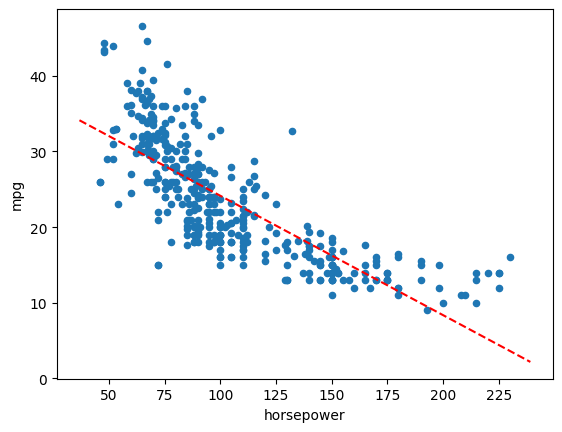

In [5]:
# Plotting the regression line
ax = Auto.plot.scatter('horsepower','mpg')
#ax.axline(results.params['intercept'], results.params['horsepower'], color='red', linestyle='--')
abline(ax,results.params['intercept'],results.params['horsepower'],color='red',linestyle='--')

### 9

In [6]:
Auto = pd.read_csv("data/Auto.csv")

Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [25]:
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'],errors='coerce')
Auto = Auto.dropna(subset=['horsepower']).reset_index(drop=True)

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

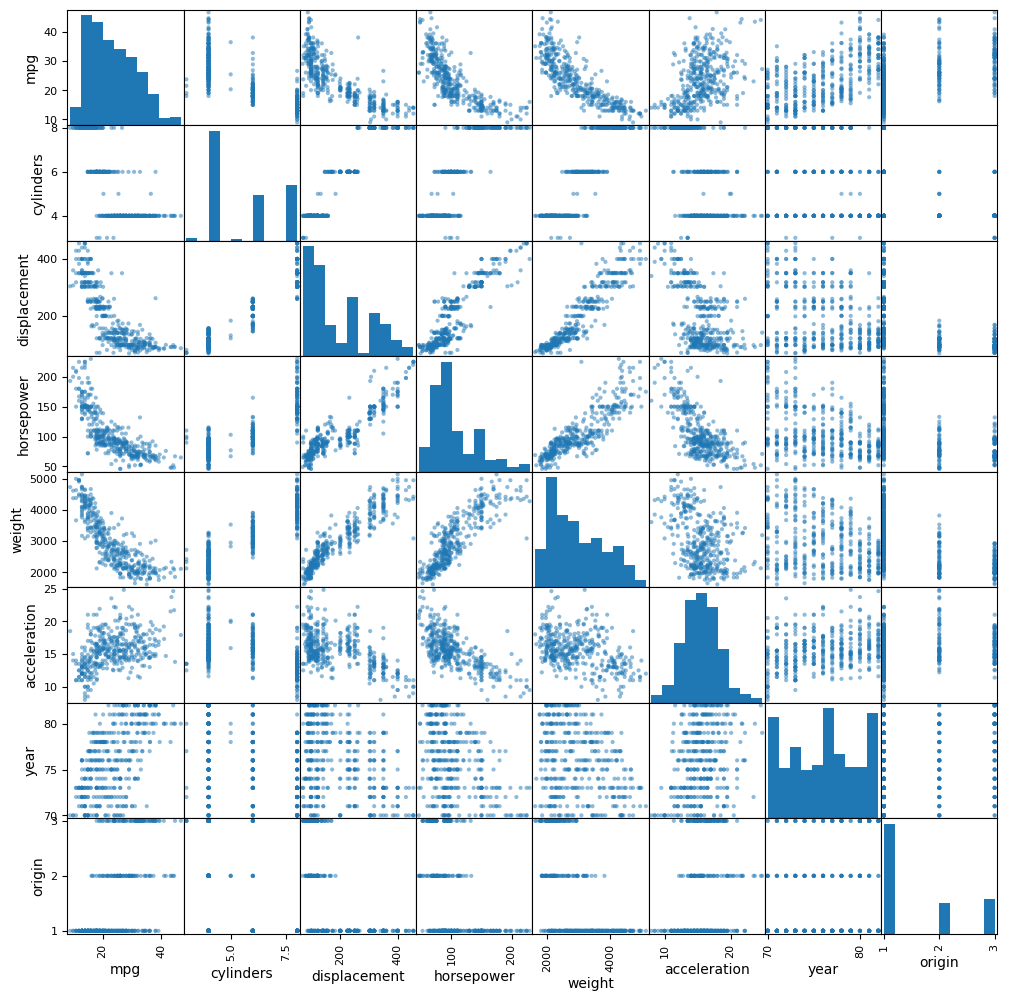

In [8]:
from pandas.plotting import scatter_matrix

scatter_matrix(Auto,figsize=(12,12),diagonal='hist')


In [13]:
Auto.set_index("name",inplace=True)

In [16]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


In [26]:
Auto['mpg'] = pd.to_numeric(Auto['mpg'],errors='coerce')
Auto = Auto.dropna(subset=['mpg']).reset_index(drop=True)

In [34]:
y = Auto['mpg']
X = Auto.drop(['mpg'], axis=1)

X['intercept'] = np.ones(X.shape[0])

X = MS(X).fit_transform(X)

model = sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-8.6092,2.322,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000
intercept,-8.6092,2.322,-3.707,0.000


In [35]:
anova_lm(results)

AttributeError: 'PandasData' object has no attribute 'design_info'